In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Retrieve and load the Olivetti faces dataset
dataset = datasets.fetch_olivetti_faces()

# Intial data exploration

In [3]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

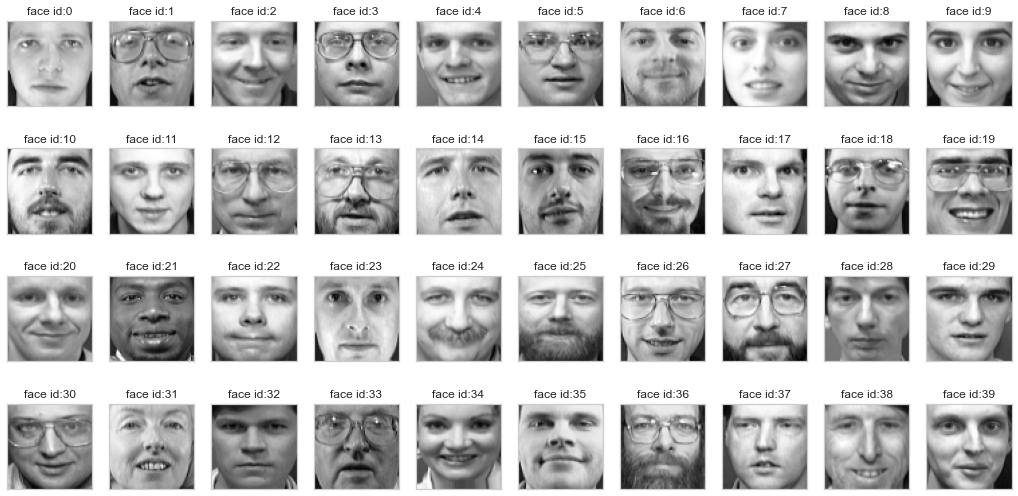

In [4]:
# Vizualizing the dataset
# plot a sample image for each of the 40 classes

images = dataset.images 

fig = plt.figure(figsize=(18,9)) 

for unique_id in range(40): 
    image_index = unique_id*10
    img_grid = fig.add_subplot(4, 10,  unique_id+1)
    img_grid.imshow(images[image_index], cmap='gray')
    img_grid.set_xticks([])
    img_grid.set_yticks([])
    img_grid.set_title("face id:{}".format(unique_id))

plt.show()

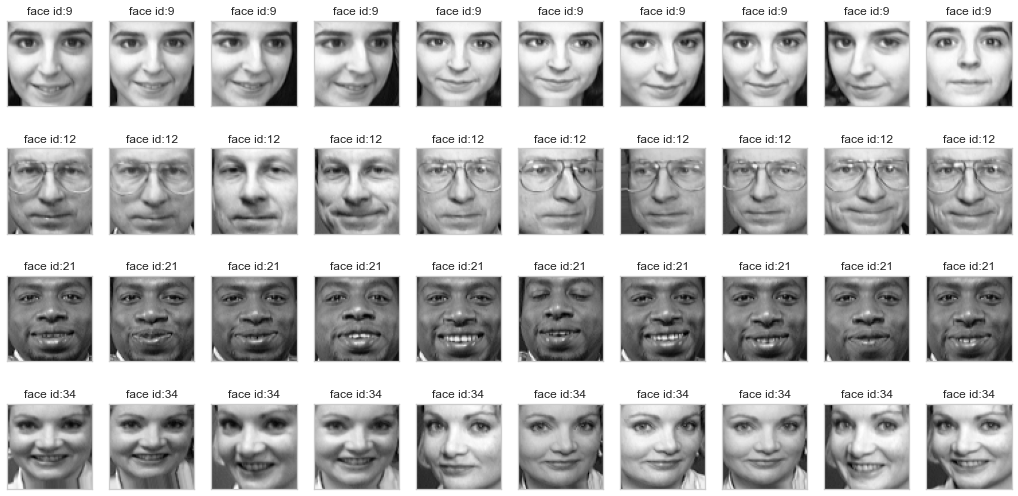

In [5]:
# plot all the 10 faces for 4 classes

fig = plt.figure(figsize=(18,9)) 
spec = fig.add_gridspec(ncols=10, nrows=4)

for i, class_id in enumerate([9, 12, 21, 34]): 
    for j in range(10):
        image_index = class_id*10 + j 
        img_grid = fig.add_subplot(spec[i, j])
        img_grid.imshow(images[image_index], cmap='gray')
        img_grid.set_xticks([])
        img_grid.set_yticks([])
        img_grid.set_title("face id:{}".format(class_id))

plt.show()

In [6]:
target = dataset.target
data = dataset.images.reshape(len(dataset.images),-1)

In [7]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(dataset.images.shape[1], dataset.images.shape[2]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64


# Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set.

In [8]:
#Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set.
#train test split
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=16)
train, test=next(strat_split.split(dataset.data, dataset.target))

In [9]:
X_train_valid=dataset.data[train]
y_train_valid=dataset.target[train]
X_test=dataset.data[test]
y_test=dataset.target[test]

In [10]:
#train validation split
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=16)

train, validation=next(strat_split.split(X_train_valid, y_train_valid))

In [11]:
X_train=X_train_valid[train]
y_train=y_train_valid[train]
X_valid=X_train_valid[validation]
y_valid=y_train_valid[validation]

In [12]:
# printing the shape
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


# Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. 

In [13]:
#Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. [30 points]

kfold =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# checking if data is split equally in each fold
for train_index, test_index in kfold.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 252, Test set:28
Fold:2, Train set: 252, Test set:28
Fold:3, Train set: 252, Test set:28
Fold:4, Train set: 252, Test set:28
Fold:5, Train set: 252, Test set:28
Fold:6, Train set: 252, Test set:28
Fold:7, Train set: 252, Test set:28
Fold:8, Train set: 252, Test set:28
Fold:9, Train set: 252, Test set:28
Fold:10, Train set: 252, Test set:28


In [14]:
LR_clf = LogisticRegression(multi_class="auto", C = 1,tol=1e-1, max_iter = 1000)

scores = cross_val_score(LR_clf, X_valid, y_valid, cv=kfold, scoring="accuracy")
print("Scores on k-fold cross validation: ", scores)
print("Mean of Scores on k-fold cross validation: ", scores.mean())

LR_clf.fit(X_train, y_train)

print("Score of Logistic Regression classifier : ",
      LR_clf.score(X_valid, y_valid))

y_pred = LR_clf.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_pred, y_test))

Scores on k-fold cross validation:  [0.25  0.25  0.5   0.25  0.375 0.75  0.125 0.125 0.375 0.5  ]
Mean of Scores on k-fold cross validation:  0.35
Score of Logistic Regression classifier :  0.9875
Accuracy Score:  0.975


In [15]:
scaler = StandardScaler() # using standard scalar to scale the values 
scaler.fit(data)
X_scale = scaler.transform(data)
data = pd.DataFrame(X_scale) # storing them in data variable

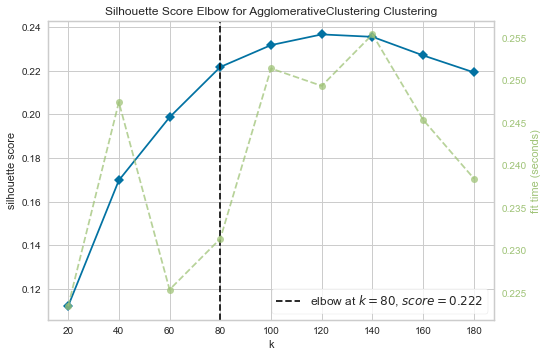

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=range(20,200,20),metric='silhouette')
visualizer.fit(data)# Fit the data to the visualizer
visualizer.show() 

In [17]:
kmeans_scale = KMeans(n_clusters=120, n_init=100, max_iter=1000, init='k-means++', random_state=42).fit(data)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(data, kmeans_scale.labels_, metric='euclidean')))

KMeans Scaled Silhouette Score: 0.20734934508800507


In [18]:
X = data.iloc[:].values

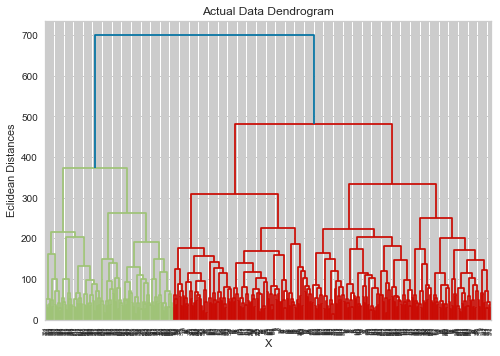

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Actual Data Dendrogram")
plt.xlabel("X")
plt.ylabel("Eclidean Distances")
plt.show()

In [20]:
"""4. reduce the dimensionality of the set using pca to see a good dendro"""
#----Reduced dimensionality using PCA---#

pca = PCA(2) # create a PCA object
pca.fit(X_train) # do the math
X_train_reduced = pca.transform(X_train) # get PCA coordinates for scaled_data

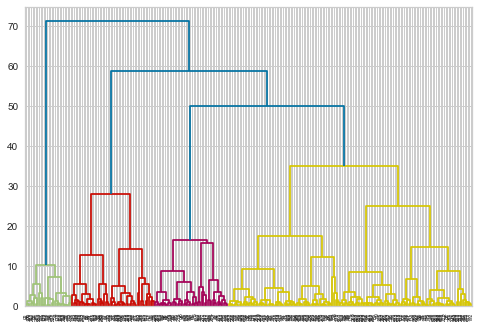

In [21]:
dnd = sch.dendrogram(sch.linkage(X_train_reduced, method='ward'))

"""4. Using Agglomerative Hierarchical Clustering (AHC) by using the following similarity measures:
a) Euclidean Distance [20 points]
b) Minkowski Distance [20 points]
c) Cosine Similarity [20 points]"""

In [22]:
def euclidian(X):
    def euclidian_distance(point_1, point_2):
        return np.sqrt(np.sum(np.square(np.array(point_1) - np.array(point_2))))
    return pairwise_distances(X,Y=None,metric=euclidian_distance, force_all_finite=True)

def minkowski(X):
    def minkowski_distance(point_1, point_2, p = 4):
        return np.sum(np.abs(point_1 - point_2)**p)**(1/p)
    return pairwise_distances(X,Y=None,metric=minkowski_distance, force_all_finite=True)

def cosine(X):
    def cosine_similarity(point_1, point_2): 
        return dot(point_1, point_2)/(norm(point_1)*norm(point_2))
    return pairwise_distances(X,Y=None,metric=cosine_similarity, force_all_finite=True)

In [23]:
print(f'\n\n\n----Euclidean Distance: ----')
for k in range(20,200,20):
    euclidean_clusterer = AgglomerativeClustering(n_clusters=k, affinity=euclidian, linkage='average')
    y_predict_euclidean = euclidean_clusterer.fit_predict(X_train)
    print(f"KMeans Scaled Silhouette Score: for {k} --> {silhouette_score(X_train, y_predict_euclidean)}")




----Euclidean Distance: ----
KMeans Scaled Silhouette Score: for 20 --> 0.08479703962802887
KMeans Scaled Silhouette Score: for 40 --> 0.14433439075946808
KMeans Scaled Silhouette Score: for 60 --> 0.17973491549491882
KMeans Scaled Silhouette Score: for 80 --> 0.1925201416015625
KMeans Scaled Silhouette Score: for 100 --> 0.20477823913097382
KMeans Scaled Silhouette Score: for 120 --> 0.21567131578922272
KMeans Scaled Silhouette Score: for 140 --> 0.20708051323890686
KMeans Scaled Silhouette Score: for 160 --> 0.18664221465587616
KMeans Scaled Silhouette Score: for 180 --> 0.1696944385766983


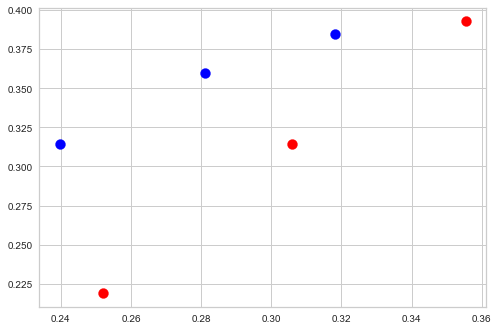

In [24]:
plt.scatter(X_train[y_predict_euclidean==0,0], X_train[y_predict_euclidean == 0,1], s=100, c= 'red')
plt.scatter(X_train[y_predict_euclidean==1,0], X_train[y_predict_euclidean == 1,1], s=100, c= 'blue')

In [25]:
print(f'\n\n\n----Minkowski Distance: ----')
for k in range(20,200,20):
    agg_minkowski = AgglomerativeClustering(n_clusters=k, affinity=minkowski, linkage='complete')
    y_predict_minkowski = agg_minkowski.fit_predict(X_train) 
    print(f"KMeans Scaled Silhouette Score: for {k} --> {silhouette_score(X_train, y_predict_minkowski)}")




----Minkowski Distance: ----
KMeans Scaled Silhouette Score: for 20 --> 0.08008410781621933
KMeans Scaled Silhouette Score: for 40 --> 0.12886804342269897
KMeans Scaled Silhouette Score: for 60 --> 0.1470087319612503
KMeans Scaled Silhouette Score: for 80 --> 0.16325166821479797
KMeans Scaled Silhouette Score: for 100 --> 0.15804031491279602
KMeans Scaled Silhouette Score: for 120 --> 0.16841673851013184
KMeans Scaled Silhouette Score: for 140 --> 0.1635383814573288
KMeans Scaled Silhouette Score: for 160 --> 0.1592460423707962
KMeans Scaled Silhouette Score: for 180 --> 0.13537196815013885


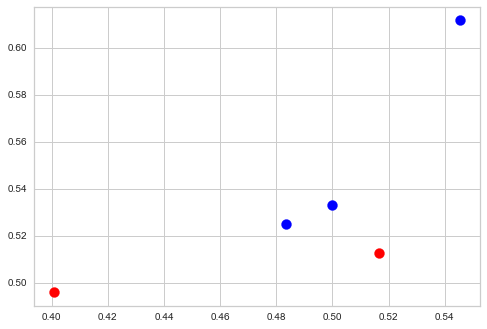

In [26]:
plt.scatter(X_train[y_predict_minkowski==0,0], X_train[y_predict_minkowski == 0,1], s=100, c= 'red')
plt.scatter(X_train[y_predict_minkowski==1,0], X_train[y_predict_minkowski == 1,1], s=100, c= 'blue')

In [27]:
print(f'\n\n\n----Cosine similarity: ----')
for k in range(20,200,20):
    agg_cosine = AgglomerativeClustering(n_clusters=k, affinity=cosine, linkage='average')
    y_predict_cosine = agg_cosine.fit_predict(X_train)
    print(f"KMeans Scaled Silhouette Score: for {k} --> {silhouette_score(X_train, y_predict_cosine)}")




----Cosine similarity: ----
KMeans Scaled Silhouette Score: for 20 --> -0.26548120379447937
KMeans Scaled Silhouette Score: for 40 --> -0.28085824847221375
KMeans Scaled Silhouette Score: for 60 --> -0.2813293933868408
KMeans Scaled Silhouette Score: for 80 --> -0.26911309361457825
KMeans Scaled Silhouette Score: for 100 --> -0.2619768977165222
KMeans Scaled Silhouette Score: for 120 --> -0.2596374750137329
KMeans Scaled Silhouette Score: for 140 --> -0.24554848670959473
KMeans Scaled Silhouette Score: for 160 --> -0.22537513077259064
KMeans Scaled Silhouette Score: for 180 --> -0.19838029146194458


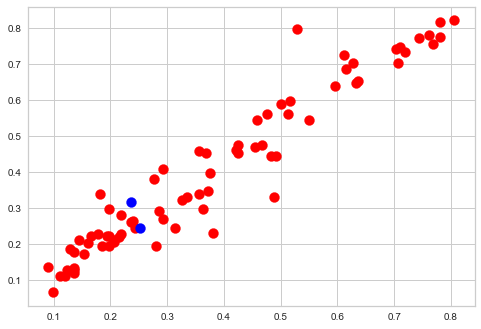

In [28]:
plt.scatter(X_train[y_predict_cosine==0,0], X_train[y_predict_cosine == 0,1], s=100, c= 'red')
plt.scatter(X_train[y_predict_cosine==1,0], X_train[y_predict_cosine == 1,1], s=100, c= 'blue')

In [29]:
#reducing the dimensionality with selected cluster size
Agglomeration = FeatureAgglomeration(n_clusters=120,memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
Agglomeration.fit(X_train)
X_train_reduced = Agglomeration.transform(X_train)
X_test_reduced = Agglomeration.transform(X_test)
X_valid_reduced = Agglomeration.transform(X_valid)

In [30]:
X_train_reduced.shape

(280, 120)

In [31]:
X_test_reduced.shape

(40, 120)

In [32]:
X_valid_reduced.shape

(80, 120)

In [33]:
y_predict_euclidean.shape

(280,)

In [34]:
kfold =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# checking if data is split equally in each fold
for train_index, test_index in kfold.split(X_train_reduced, y_predict_euclidean):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 252, Test set:28
Fold:2, Train set: 252, Test set:28
Fold:3, Train set: 252, Test set:28
Fold:4, Train set: 252, Test set:28
Fold:5, Train set: 252, Test set:28
Fold:6, Train set: 252, Test set:28
Fold:7, Train set: 252, Test set:28
Fold:8, Train set: 252, Test set:28
Fold:9, Train set: 252, Test set:28
Fold:10, Train set: 252, Test set:28


In [35]:
"""Use the set from (4(a), 4(b), or 4(c)) to train a classifier as in (3) using k-fold cross validation."""

#Created object of logistic classifier 
lr_model_eu = LogisticRegression(multi_class='auto',max_iter= 1000)

scores = cross_val_score(lr_model_eu, X_valid_reduced, y_valid, cv=kfold, scoring="accuracy")
print("Mean of Scores on k-fold cross validation: ", scores.mean())

#fitted scaled trainning data with reduced dimensionality and labels for Euclidean
lr_model_eu.fit(X_train_reduced, y_predict_euclidean)
print("Score of Logistic Regression: ",lr_model_eu.score(X_valid_reduced, y_valid))

# Predicted values from logistic classifier on test data
y_pred = lr_model_eu.predict(X_test_reduced)
print("Accuracy Score after reduction : ",accuracy_score(y_pred, y_test))

Mean of Scores on k-fold cross validation:  0.0375
Score of Logistic Regression:  0.0125
Accuracy Score after reduction :  0.025
